In [9]:
import os
from os import environ

import requests
import io
import string

import datetime

import numpy as np
import pandas as pd

from pandas import Series
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive

In [10]:
Box_LF=pd.read_csv('GUI_in_LF.csv')
Box_Revenue=pd.read_csv('GUI_in_Revenue.csv')

In [11]:
dropdown_route=widgets.Dropdown(
    options=['All','LUX-CPH', 'LUX-LCY'],
    value='All',
    description='Route:',
    disabled=False,
)

dropdown_season=widgets.Dropdown(
    options=['All','H', 'M','L'],
    value='All',
    description='Season:',
    disabled=False,
)

dropdown_weekday=widgets.Dropdown(
    options=['All',1,2,3,4,5,6,7],
    value='All',
    description='Weekday:',
    disabled=False,
)

dropdown_fltnum=widgets.Dropdown(
    options=['All']+sorted(Box_LF['Flight Number'].unique()),
    value='All',
    description='Flt.Num.:',
    disabled=False,
)

def view(v='', y='', z='', w=''):
    
    if y=='All' and z=='All' and w=='All' and v=='All':
        Box_LF['Cluster']='All'
        fig= plt.figure(figsize=(14,10))
        ax=sns.boxplot(x="Sample", y="LF",
        data=Box_LF, palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF, palette="Set3")

        fig= plt.figure(figsize=(14,10))        
        bx=sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue, palette="Set3",boxprops=dict(alpha=.2))
        bx = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue, palette="Set3")     
    ##############            
    elif y!='All' and z=='All' and w=='All' and v=='All':
        Box_LF['Cluster']='All'
        
        fig= plt.figure(figsize=(14,10))
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[Box_LF['SEASON']==y,:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[Box_LF['SEASON']==y,:], palette="Set3")
        
        fig= plt.figure(figsize=(14,10))
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[Box_Revenue['SEASON']==y,:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[Box_Revenue['SEASON']==y,:], palette="Set3")    
        
    elif y=='All' and z!='All' and w=='All' and v=='All':
        Box_LF['Cluster']='All'
        
        fig= plt.figure(figsize=(14,10))
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[Box_LF['Weekday']==z,:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[Box_LF['Weekday']==z,:], palette="Set3")
        
        fig= plt.figure(figsize=(14,10))
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[Box_Revenue['Weekday']==z,:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[Box_Revenue['Weekday']==z,:], palette="Set3")
             
    elif y=='All' and z=='All' and w!='All' and v=='All':
        Box_LF['Cluster']='All'
        
        fig= plt.figure(figsize=(14,10))
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[Box_LF['Flight Number']==w,:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[Box_LF['Flight Number']==w,:], palette="Set3")  
        
        fig= plt.figure(figsize=(14,10))
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[Box_Revenue['Flight Number']==w,:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[Box_Revenue['Flight Number']==w,:], palette="Set3")
        
    elif y=='All' and z=='All' and w=='All' and v!='All':
        Box_LF['Cluster']='All'
        
        fig= plt.figure(figsize=(14,10))
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[Box_LF['Route']==v,:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[Box_LF['Route']==v,:], palette="Set3")  
        
        fig= plt.figure(figsize=(14,10))
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[Box_Revenue['Route']==v,:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[Box_Revenue['Route']==v,:], palette="Set3")          
        
    ##############    
    elif y!='All' and z!='All' and w=='All' and v=='All':
        fig= plt.figure(figsize=(14,10))
        
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Weekday']==z)&(Box_LF['SEASON']==y),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Weekday']==z)&(Box_LF['SEASON']==y),:], palette="Set3")

        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['Weekday']==z)&(Box_Revenue['SEASON']==y),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['Weekday']==z)&(Box_Revenue['SEASON']==y),:], palette="Set3")         
        
    elif y!='All' and z=='All' and w!='All' and v=='All':
        fig= plt.figure(figsize=(14,10))
        
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Cluster", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Flight Number']==w),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Flight Number']==w),:], palette="Set3")
        
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Cluster", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['SEASON']==y)&(Box_Revenue['Flight Number']==w),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['SEASON']==y)&(Box_Revenue['Flight Number']==w),:], palette="Set3")        
        
    elif y!='All' and z=='All' and w=='All' and v!='All':
        
        fig= plt.figure(figsize=(14,10))
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Route']==v),:], palette="Set3")

        fig= plt.figure(figsize=(14,10))
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['SEASON']==y)&(Box_Revenue['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['SEASON']==y)&(Box_Revenue['Route']==v),:], palette="Set3")
        
    elif y=='All' and z!='All' and w!='All' and v=='All':
        
        fig= plt.figure(figsize=(14,10))
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Weekday']==z)&(Box_LF['Flight Number']==w),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Weekday']==z)&(Box_LF['Flight Number']==w),:], palette="Set3")

        fig= plt.figure(figsize=(14,10))
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['Weekday']==z)&(Box_Revenue['Flight Number']==w),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['Weekday']==z)&(Box_Revenue['Flight Number']==w),:], palette="Set3")
        
    elif y=='All' and z!='All' and w=='All' and v!='All':
        
        fig= plt.figure(figsize=(14,10))
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Weekday']==z)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Weekday']==z)&(Box_LF['Route']==v),:], palette="Set3")

        fig= plt.figure(figsize=(14,10))
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['Weekday']==z)&(Box_Revenue['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['Weekday']==z)&(Box_Revenue['Route']==v),:], palette="Set3")
        
    elif y=='All' and z=='All' and w!='All' and v!='All':
        
        fig= plt.figure(figsize=(14,10))
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Flight Number']==w)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Flight Number']==w)&(Box_LF['Route']==v),:], palette="Set3")

        fig= plt.figure(figsize=(14,10))
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['Flight Number']==w)&(Box_Revenue['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_Revenue['Flight Number']==w)&(Box_Revenue['Route']==v),:], palette="Set3")
        
    elif y!='All' and z!='All' and w!='All' and v=='All':
        
        fig= plt.figure(figsize=(14,10))
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Weekday']==z)&(Box_LF['Fligth Number']==w),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Weekday']==z)&(Box_LF['Fligth Number']==w),:], palette="Set3")

        fig= plt.figure(figsize=(14,10))
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_LF['SEASON']==y)&(Box_LF['Weekday']==z)&(Box_LF['Fligth Number']==w),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_LF['SEASON']==y)&(Box_LF['Weekday']==z)&(Box_LF['Fligth Number']==w),:], palette="Set3")
        
    elif y!='All' and z!='All' and w=='All' and v!='All':
        
        fig= plt.figure(figsize=(14,10))
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Weekday']==z)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Weekday']==z)&(Box_LF['Route']==v),:], palette="Set3")

        fig= plt.figure(figsize=(14,10))
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_LF['SEASON']==y)&(Box_LF['Weekday']==z)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_LF['SEASON']==y)&(Box_LF['Weekday']==z)&(Box_LF['Route']==v),:], palette="Set3")
        
    elif y!='All' and z=='All' and w!='All' and v!='All':
        
        fig= plt.figure(figsize=(14,10))
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Fligth Number']==w)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['SEASON']==y)&(Box_LF['Fligth Number']==w)&(Box_LF['Route']==v),:], palette="Set3")

        fig= plt.figure(figsize=(14,10))
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_LF['SEASON']==y)&(Box_LF['Fligth Number']==w)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_LF['SEASON']==y)&(Box_LF['Fligth Number']==w)&(Box_LF['Route']==v),:], palette="Set3")
        
    elif y=='All' and z!='All' and w!='All' and v!='All':
        
        fig= plt.figure(figsize=(14,10))
        Box_LF['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Weekday']==z)&(Box_LF['Fligth Number']==w)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="LF",
        data=Box_LF.loc[(Box_LF['Weekday']==z)&(Box_LF['Fligth Number']==w)&(Box_LF['Route']==v),:], palette="Set3")

        fig= plt.figure(figsize=(14,10))
        Box_Revenue['Cluster']='All'
        ax = sns.boxplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_LF['Weekday']==z)&(Box_LF['Fligth Number']==w)&(Box_LF['Route']==v),:], palette="Set3",boxprops=dict(alpha=.2))
        ax = sns.swarmplot(x="Sample", y="Revenue",
        data=Box_Revenue.loc[(Box_LF['Weekday']==z)&(Box_LF['Fligth Number']==w)&(Box_LF['Route']==v),:], palette="Set3") 

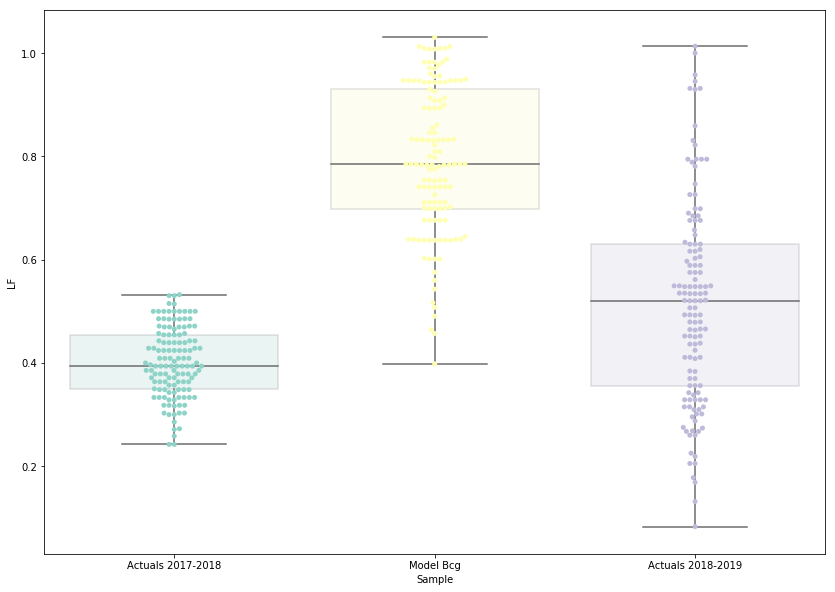

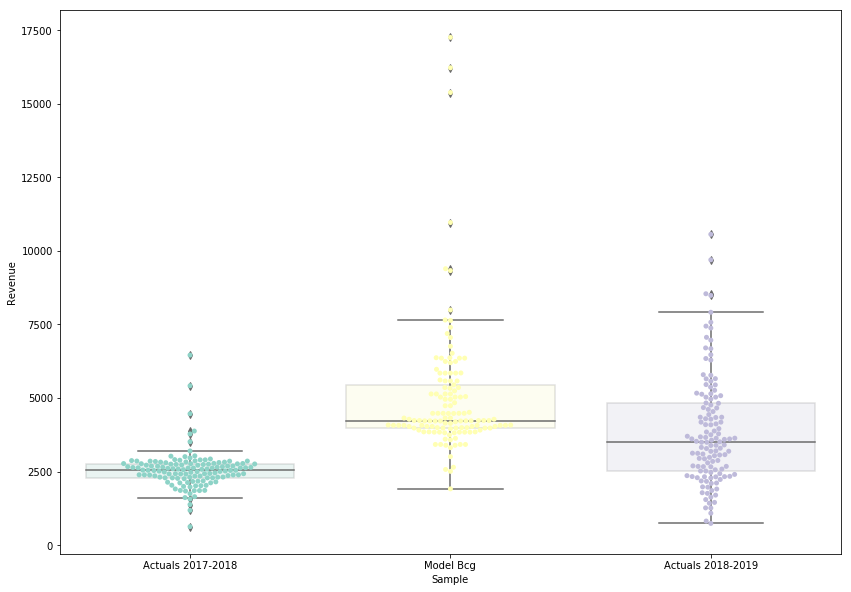

In [12]:
display(interactive(view,v=dropdown_route,y=dropdown_season,z=dropdown_weekday,w=dropdown_fltnum))